In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
read_csv('/data/petar/fgf1/resolve/rois/32810-1377-slide3_A1-1_DAPI_dapi_ROIs.csv') %>% head

Rows: 37772 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ROI_Name
dbl (2): X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ROI_Name,X,Y
<chr>,<dbl>,<dbl>
Cell1_5276_26,5278,16
Cell1_5276_26,5285,16
Cell1_5276_26,5290,20
Cell1_5276_26,5285,35
Cell1_5276_26,5275,42
Cell1_5276_26,5266,42


In [2]:
cell_stats = read_csv('/data/petar/fgf1/resolve/baysor_segmentation/32810-1377-slide3_A1-1_results_baysor_results/baysor_cell_stats.csv')
cell_stats %>% head

Rows: 18986 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): cell
dbl (7): x, y, n_transcripts, density, elongation, area, avg_confidence

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cell,x,y,n_transcripts,density,elongation,area,avg_confidence
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cell1_4012_26,4011.529,26.44203,138,0.04986,1.381,2768,0.9854
Cell2_4020_72,4020.296,71.72959,196,0.05998,1.831,3268,0.9927
Cell3_3895_189,3894.667,189.22222,117,0.04684,4.285,2498,0.9858
Cell4_3880_239,3879.782,239.14523,482,0.07543,1.157,6390,0.9974
Cell5_4017_126,4016.688,125.86458,192,0.06028,1.188,3185,0.9919
Cell6_3803_344,3803.318,344.18750,176,0.05479,1.858,3212,0.9909


In [3]:
baysor_counts = read_delim('/data/petar/fgf1/resolve/baysor_segmentation/32810-1377-slide3_A1-1_results_baysor_results/baysor_counts.txt')
baysor_counts %>% head

Rows: 100 Columns: 18987
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr     (1): gene
dbl (18986): Cell1_4012_26, Cell2_4020_72, Cell3_3895_189, Cell4_3880_239, C...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


gene,Cell1_4012_26,Cell2_4020_72,Cell3_3895_189,Cell4_3880_239,Cell5_4017_126,Cell6_3803_344,Cell7_3796_387,Cell8_3883_301,Cell9_3665_514,⋯,Cell18977_7892_4507,Cell18978_10249_1610,Cell18979_5400_1676,Cell18980_5363_9219,Cell18981_6255_1568,Cell18982_5953_8046,Cell18983_6038_7548,Cell18984_10142_5899,Cell18985_3374_13350,Cell18986_10334_3680
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Adarb2,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Agrp,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Alcam,0,0,0,4,0,1,1,0,1,⋯,0,0,0,0,0,0,0,0,0,0
Aqp4,49,0,45,54,1,59,8,2,27,⋯,0,0,0,0,0,0,0,0,0,0
Arhgap6,0,0,1,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
Bmp4,0,0,0,1,0,0,1,1,0,⋯,0,0,0,0,0,0,0,0,0,0


In [4]:
baysor_results = read_csv('/data/petar/fgf1/resolve/baysor_segmentation/32810-1377-slide3_A1-1_results_baysor_results/baysor_results.csv')
baysor_results %>% head

Rows: 3282829 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): gene, cell
dbl (6): x, y, molecule_id, prior_segmentation, confidence, assignment_confi...
lgl (1): is_noise

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


x,y,gene,molecule_id,prior_segmentation,confidence,cell,assignment_confidence,is_noise
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>
3581,794,Sorcs1,1,0,0.23330,0,1.00,TRUE
4066,214,Sorcs1,2,0,0.98475,Cell12623_4069_233,0.50,FALSE
2923,1735,Sorcs1,3,0,0.99620,Cell14143_2919_1727,0.78,FALSE
3396,1165,Sorcs1,4,0,0.99779,Cell39_3407_1165,1.00,FALSE
3423,1185,Sorcs1,5,0,0.99837,Cell39_3407_1165,1.00,FALSE
4053,246,Sorcs1,6,0,0.95551,0,0.62,TRUE


In [36]:
baysor_results %>% head %>% print(width=300)

# A tibble: 6 × 9
      x     y gene   molecule_id prior_segmentation confidence
  <dbl> <dbl> <chr>        <dbl>              <dbl>      <dbl>
1  3581   794 Sorcs1           1                  0      0.233
2  4066   214 Sorcs1           2                  0      0.985
3  2923  1735 Sorcs1           3                  0      0.996
4  3396  1165 Sorcs1           4                  0      0.998
5  3423  1185 Sorcs1           5                  0      0.998
6  4053   246 Sorcs1           6                  0      0.956
  cell                assignment_confidence is_noise
  <chr>                               <dbl> <lgl>   
1 0                                    1    TRUE    
2 Cell12623_4069_233                   0.5  FALSE   
3 Cell14143_2919_1727                  0.78 FALSE   
4 Cell39_3407_1165                     1    FALSE   
5 Cell39_3407_1165                     1    FALSE   
6 0                                    0.62 TRUE    


In [146]:
# Read the baysor_results file
baysor_results <- read_csv("/data/petar/fgf1/resolve/baysor_segmentation/32810-1377-slide3_A1-1_results_baysor_results/baysor_results.csv")

# Extract the gene names and cell barcodes
gene_names <- baysor_results %>% select(gene) %>% unique() %>% pull()
cell_barcodes <- baysor_results %>% select(cell) %>% unique() %>% pull()

# Convert the gene names and cell barcodes to character vectors
gene_names <- as.character(gene_names)
cell_barcodes <- as.character(cell_barcodes)

# Create a sparse matrix to store the count values
sparse_counts <- sparseMatrix(i = numeric(0), j = numeric(0), x = numeric(0),
                              dims = c(length(gene_names), length(cell_barcodes)),
                              dimnames = list(gene_names, cell_barcodes))

# Add the count values to the sparse matrix
gene_indices <- match(baysor_results$gene, gene_names)
cell_indices <- match(baysor_results$cell, cell_barcodes)
sparse_counts[gene_indices, cell_indices] <- sparse_counts[gene_indices, cell_indices] + 1

# Write the count values to the matrix.mtx.gz file

Rows: 3282829 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): gene, cell
dbl (6): x, y, molecule_id, prior_segmentation, confidence, assignment_confi...
lgl (1): is_noise

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 80294.7 GiB”


ERROR: Error: cannot allocate vector of size 80294.7 Gb


In [139]:
gene_counts %>% head

         cell
gene          0 Cell1_4012_26 Cell10_3625_547 Cell100_4484_670
  Adarb2   1867             0               0                0
  Agrp     2306             0               0                0
  Alcam   18287             0               0                3
  Aqp4    15885            49              45                0
  Arhgap6  4243             0               0                0
         cell
gene      Cell1000_5663_2685 Cell10000_9129_13312 Cell10001_7423_16733
  Adarb2                   0                    0                    0
  Agrp                     0                    0                    0
  Alcam                    4                    8                    1
  Aqp4                     0                    0                    0
  Arhgap6                  1                    1                    0
         cell
gene      Cell10002_2432_2392 Cell10003_8358_77 Cell10004_9190_600
  Adarb2                    0                 0                  0
  Agrp              

In [142]:
dim(sparse_counts)

[1] 1898700   19086

In [144]:
sparse_counts %>% head(100)

   [[ suppressing 33 column names ‘(Intercept)’, ‘geneAgrp’, ‘geneAlcam’ ... ]]



100 x 19086 sparse Matrix of class "dgCMatrix"
                                                                            
1   1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
2   1 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
3   1 . 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
4   1 . . 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
5   1 . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
6   1 . . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
7   1 . . . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . . . ......
8   1 . . . . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . . ......
9   1 . . . . . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . ......
10  1 . . . . . . . . 1 . . . . . . . . . . . . . . . . . . . . . . . ......
11  1 . . . . . . . . . 1 . . . . . . . . . . . . . . . . . . . . . . ......
12  1 . . . . . . . . . . 1 .

In [54]:
# Write the count values to the matrix.mtx.gz file
writeMM(sparse_counts, "matrix.mtx.gz")

NULL

In [66]:
library(gprofiler2)
# Extract the unique gene names
# Extract the unique gene names
# Extract the unique gene names
gene_names <- baysor_results %>% select(gene) %>% unique() %>% pull()

# Use gconvert to get the gene IDs
gp_result <- gconvert(gene_names, organism = "mmusculus", target = "ENSG")
gene_ids <- gp_result %>% select(target, name)

# Create a data frame with the gene names and gene IDs
features_df <- data.frame(gene_id = gene_ids$target, 
                          gene_name = gene_ids$name, 
                          feature_type = "Gene Expression")

# Write the data frame to the features.tsv.gz file
write_tsv(features_df, "features.tsv.gz")


In [67]:
# Extract the unique cell IDs
cell_ids <- baysor_results %>% select(cell) %>% unique() %>% pull()

# Create a data frame with the cell IDs
barcodes_df <- data.frame(cell_id = cell_ids)

# Write the data frame to the barcodes.tsv.gz file
write_tsv(barcodes_df, "barcodes.tsv.gz")

In [135]:
barcodes_df

cell_id
<chr>
0
Cell12623_4069_233
Cell14143_2919_1727
Cell39_3407_1165
Cell32_4287_247
Cell13700_2650_1941
Cell70_3081_1878
Cell15791_3581_1632
Cell8892_3781_1822


In [3]:
#32810-1377-slide3_A1-1
dapi_area = read_csv('/data/petar/fgf1/resolve/rois/32810-1377-slide3_A1-1_DAPI_dapi_ROIs_areas.csv')
dapi_area = dapi_area %>%
rename(nucleus_area = Area)

dapi_area %>% head
dapi_area

Rows: 3275 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ROI_Name
dbl (1): Area

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ROI_Name,nucleus_area
<chr>,<dbl>
Cell1_5276_26,501.5
Cell2_10026_31,591.0
Cell3_8807_54,514.5
Cell4_5315_80,1560.5
Cell5_4847_83,1829.5
Cell6_10173_100,2348.5


In [5]:
read_csv('nuclei_index.csv') %>% head

Rows: 2854 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Original_ROI, New_ROI

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Original_ROI,New_ROI
<chr>,<chr>
Cell322_5665_2666,Cell1000_5663_2685
Cell350_9702_2807,Cell10029_9705_2807
Cell1237_1116_7226,Cell1002_1111_7230
Cell23_9103_250,Cell10055_9086_238
Cell23_9103_250,Cell17159_9125_244
Cell674_8248_4820,Cell10127_8248_4803


In [4]:
nuclei_rois = read_csv('nuclei_index.csv')
nuclei_rois = nuclei_rois %>%
rename(cell_id = New_ROI) %>%
rename(ROI_Name = Original_ROI)

nuclei_rois %>% head
dim(nuclei_rois)

Rows: 2854 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Original_ROI, New_ROI

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ROI_Name,cell_id
<chr>,<chr>
Cell322_5665_2666,Cell1000_5663_2685
Cell350_9702_2807,Cell10029_9705_2807
Cell1237_1116_7226,Cell1002_1111_7230
Cell23_9103_250,Cell10055_9086_238
Cell23_9103_250,Cell17159_9125_244
Cell674_8248_4820,Cell10127_8248_4803


[1] 2854    2

In [102]:
cells = cell_stats %>% 
mutate(control_probe_counts = 0) %>%
mutate(control_codeword_counts = 0) %>%
rename(transcript_counts = n_transcripts) %>%
mutate(total_counts = transcript_counts) %>%
rename(cell_area = area) %>% 
rename(x_centroid = x, y_centroid = y) %>%
select(-density, -elongation, -avg_confidence) %>%
rename(cell_id = cell) %>%
left_join(nuclei_rois, by = 'cell_id') %>%
left_join(dapi_area, by = "ROI_Name")

cells %>% head
write_csv(cells, 'cells.csv.gz')

cell_id,x_centroid,y_centroid,transcript_counts,cell_area,control_probe_counts,control_codeword_counts,total_counts,ROI_Name,nucleus_area
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Cell1_4012_26,4011.529,26.44203,138,2768,0,0,138,NA,NA
Cell2_4020_72,4020.296,71.72959,196,3268,0,0,196,NA,NA
Cell3_3895_189,3894.667,189.22222,117,2498,0,0,117,NA,NA
Cell4_3880_239,3879.782,239.14523,482,6390,0,0,482,Cell20_3881_236,4441.5
Cell5_4017_126,4016.688,125.86458,192,3185,0,0,192,NA,NA
Cell6_3803_344,3803.318,344.18750,176,3212,0,0,176,Cell33_3801_345,1190.5


In [106]:
# cell_id	vertex_x	vertex_y
read_csv('/data/petar/fgf1/res.csv') %>% 
rename(cell_id = ROI_Name, vertex_x = X, vertex_y = Y) %>%
write_csv("cell_boundaries.csv.gz")

Rows: 200904 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ROI_Name
dbl (2): X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [110]:
convex_hulls %>%
filter(ROI_Name == 'Cell1_4012_26')

ROI_Name,X,Y
<chr>,<dbl>,<dbl>
Cell1_4012_26,3994,2
Cell1_4012_26,3988,3
Cell1_4012_26,3981,11
Cell1_4012_26,3986,42
Cell1_4012_26,3988,47
Cell1_4012_26,3997,54
Cell1_4012_26,4015,57
Cell1_4012_26,4022,50
Cell1_4012_26,4048,22


In [116]:
#c("transcript_id", "cell_id", "overlaps_nucleus", "feature_name", "x_location", "y_location", "z_location", "qv")
baysor_results = read_csv('overlaps_nucleus.csv')
baysor_results %>% head

Rows: 3282829 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): gene, cell
dbl (6): x, y, molecule_id, prior_segmentation, confidence, assignment_confi...
lgl (2): is_noise, within_nucleus

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


x,y,gene,molecule_id,prior_segmentation,confidence,cell,assignment_confidence,is_noise,within_nucleus
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>
3581,794,Sorcs1,1,0,0.23330,0,1.00,TRUE,FALSE
4066,214,Sorcs1,2,0,0.98475,Cell12623_4069_233,0.50,FALSE,TRUE
2923,1735,Sorcs1,3,0,0.99620,Cell14143_2919_1727,0.78,FALSE,TRUE
3396,1165,Sorcs1,4,0,0.99779,Cell39_3407_1165,1.00,FALSE,TRUE
3423,1185,Sorcs1,5,0,0.99837,Cell39_3407_1165,1.00,FALSE,TRUE
4053,246,Sorcs1,6,0,0.95551,0,0.62,TRUE,FALSE


In [132]:
transcripts = baysor_results %>%
rename(x_location = x,
       y_location = y,
       feature_name = gene,
       transcript_id = molecule_id,
       cell_id = cell,
       overlaps_nucleus = within_nucleus) %>%
mutate(z_location = 0) %>%
mutate(qv = 25) %>%
mutate(overlaps_nucleus = case_when(overlaps_nucleus == TRUE ~ 1,
                                    overlaps_nucleus == FALSE ~ 0)) %>%
mutate(is_noise = case_when(is_noise == TRUE ~ 1,
                            is_noise == FALSE ~ 0)) %>%
select(-prior_segmentation, -confidence, -assignment_confidence) %>%
relocate(is_noise,.after = "qv") %>%
relocate(any_of(c("transcript_id", "cell_id", "overlaps_nucleus", "feature_name", "x_location", "y_location", "z_location", "qv")))

transcripts %>% head
transcripts %>% write_csv("transcripts.csv.gz")

transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv,is_noise
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,Sorcs1,3581,794,0,25,1
2,Cell12623_4069_233,1,Sorcs1,4066,214,0,25,0
3,Cell14143_2919_1727,1,Sorcs1,2923,1735,0,25,0
4,Cell39_3407_1165,1,Sorcs1,3396,1165,0,25,0
5,Cell39_3407_1165,1,Sorcs1,3423,1185,0,25,0
6,0,0,Sorcs1,4053,246,0,25,1


In [123]:
baysor_results %>% distinct(prior_segmentation) %>% pull(prior_segmentation) %>% unique 

[1]    0   42  241   63  222  240   94   51  141   20   59   33  250  107
  [15]   29  242  168  254  135   81  238  134  237   70   64  175  253  182
  [29]  234  109  151   90   67    4   25   16   62   54  137  226  220   53
  [43]  162  216  245   35   24  161  205  196   57  111  146   65   74  202
  [57]  166  223  152  178  193  236   80    5  155   28   13   17    1  221
  [71]   40  124  153   96  138  186   30   45  154  164  144   86   85   92
  [85]  235  191  145  213  251   39  233   88  116  197   56   27   46  176
  [99]   79   76   89  174  136  105  158  203  103  243  214  149  157   83
 [113]  225  207  189  132  179    8   60  210   36  246  194  125  120  118
 [127]  183   12  181   87  219  159  108  230  204  147  184   48   32  215
 [141]  142   43  208  113  218  122   71   73   41  177   61   11   95  133
 [155]  187   21   98  123   50  140   44   77   10  171   26  199  198  185
 [169]  229  256   37  117   58  247  201  131  106   15   78  231  160  112
 [183]  248   31  119  165    3  173  148   55  244  227  195   38    6  121
 [197]  188  170   66  232   99  180   22  130  100   93   49  102  190   82
 [211]    9  209   97  228  200  172  255  163    2   52  110  104   14  252
 [225]   84  156  143  101   72  206  128   18   91  114  217   68  115  192
 [239]  139  249  150  129   69   75  212   19  167  127   23  126   47  224
 [253]   34  169  211    7  239  439  562  317  410  588  382  308  560  542
 [267]  298  347  480  443  299  429  499  418  372  421  316  398  441  306
 [281]  400  404  270  390  352  546  277  442  576  556  365  566  481  538
 [295]  386  258  483  265  438  388  361  332  521  530  290  262  336  477
 [309]  526  292  424  278  327  261  507  412  416  348  484  291  269  575
 [323]  355  435  385  427  284  571  468  582  432  402  497  313  417  296
 [337]  283  486  563  273  519  565  583  392  498  289  430  587  266  408
 [351]  322  358  271  568  454  377  279  399  268  257  320  373  580  549
 [365]  337  362  515  433  585  286  487  314  300  415  482  366  395  508
 [379]  359  376  324  274  476  357  513  523  448  369  500  294  467  333
 [393]  446  391  459  387  505  330  326  559  516  436  522  555  578  518
 [407]  479  529  295  534  275  543  564  297  445  469  453  452  545  548
 [421]  528  411  535  551  536  371  457  304  285  383  573  463  474  440
 [435]  450  405  321  579  466  485  423  346  403  311  345  375  334  394
 [449]  456  413  319  368  493  431  557  540  490  494  503  492  341  478
 [463]  471  374  280  511  458  301  525  527  470  353  495  569  407  260
 [477]  451  276  331  288  393  491  475  325  293  381  586  581  496  574
 [491]  572  517  422  460  539  428  420  567  444  401  287  426  509  364
 [505]  342  409  449  506  338  541  379  425  502  584  282  380  354  434
 [519]  323  520  524  419  544  267  343  272  397  531  504  455  465  558
 [533]  472  340  363  406  547  533  510  552  489  389  384  329  396  339
 [547]  264  370  514  414  328  310  335  461  512  464  437  488  263  305
 [561]  351  344  378  554  318  570  356  303  501  561  302  553  315  577
 [575]  281  447  532  473  550  350  309  259  349  360  307  367  312  462
 [589]  537  653  634  783  854  796  875  701  952  825  665  978  661  977
 [603] 1043  988  734  843  945  603  849  622  655  807  633  919 1051 1019
 [617]  959  942  840  929  973  985  776  769  598  863 1050  979  886  611
 [631]  858  656  814  675  605  811  833  915  597 1006  736  856  949  926
 [645]  758  747 1000  976 1049 1045  660  810  737  694  874  845  932 1014
 [659]  640 1017  815  970  682  956  806 1053  726  885  966  715  620  990
 [673]  714 1044  800  596  992  749  773  599  741  637  639  613 1042  821
 [687]  795  877  766  991  654  830  742  905 1055  706  782  693  752  644
 [701]  925  624 1009  650  721  916  604  890  984  703  699  802  786  870
 [715]  803  698  859  712  761 1026  921  662  899 1021  755  981 1038  797

ERROR: Error in read_csv("/data/petar/fgf1/res.csv"): could not find function "read_csv"


In [ ]:
baysor

In [5]:
baysor_results %>%
group_by(is_noise) %>% 
summarise(n = n())

is_noise,n
<lgl>,<int>
FALSE,2209395
TRUE,1073434


In [22]:
baysor_results %>%
group_by(cell) %>% 
summarise(n = n()) %>% 
filter(cell != 0) %>%
arrange(desc(n)) %>%
mutate(avg = mean(n)) %>%
mutate(stdev = sd(n)) %>%
mutate(median = median(n))

cell,n,avg,stdev,median
<chr>,<int>,<dbl>,<dbl>,<dbl>
Cell3133_2748_9814,879,116.3697,130.2413,61
Cell6372_2991_15914,828,116.3697,130.2413,61
Cell3048_2762_9689,799,116.3697,130.2413,61
Cell3387_3014_9965,785,116.3697,130.2413,61
Cell3138_1969_10608,764,116.3697,130.2413,61
Cell2723_4423_7373,754,116.3697,130.2413,61
Cell2195_9349_1408,753,116.3697,130.2413,61
Cell2033_2410_8014,744,116.3697,130.2413,61
Cell1809_2085_7955,736,116.3697,130.2413,61


In [7]:
library(ggplot2)

Warning message:
“Removed 303 rows containing non-finite values (stat_density).”


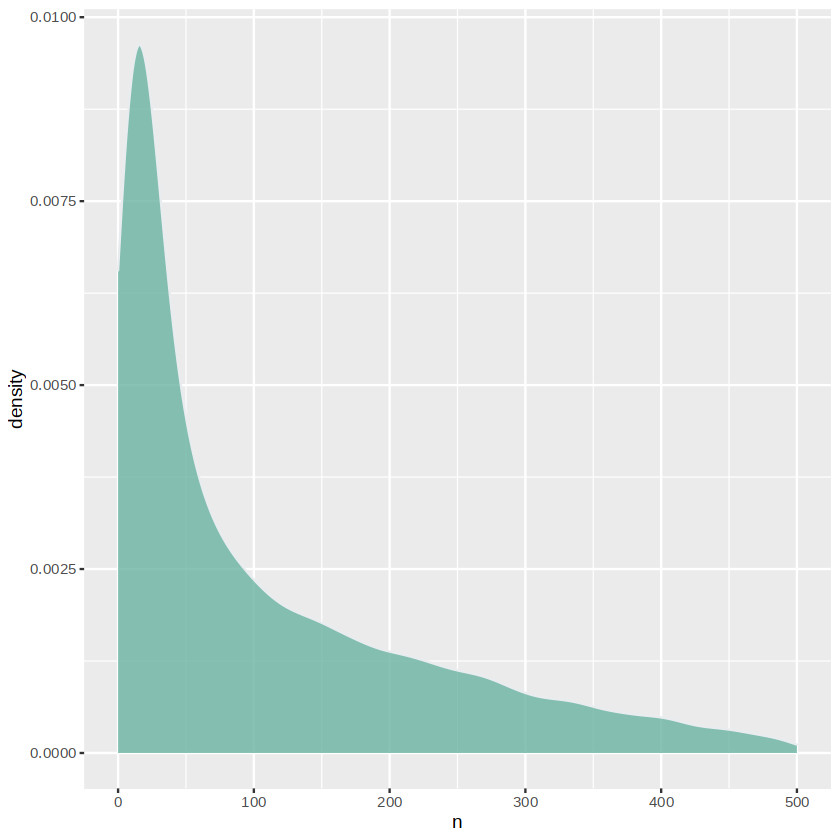

In [12]:
baysor_results %>%
group_by(cell) %>% 
summarise(n = n()) %>%
  ggplot( aes(x=n)) +
    geom_density(fill="#69b3a2", color="#e9ecef", alpha=0.8) +
  xlim(0, 500)